# Models using all variables

## Initialization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from keras.initializers import glorot_uniform

In [1]:
X_train_std = pd.read_csv("./preprocessed_datasets/X_train_std_perf.csv")
X_test_std = pd.read_csv("./preprocessed_datasets/X_test_std_perf.csv")
y_train = pd.read_csv("./preprocessed_datasets/y_train_perf.csv")
y_test = pd.read_csv("./preprocessed_datasets/y_test_perf.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15548\1789518450.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We standarize the Y values, and transform them to an array

In [4]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Linear regression models

We drop some identificative columns, so that the model doesn't learn to identify the people and overfits

In [6]:
X_train_std = X_train_std.drop(["index", "ID_Zenodo"], axis=1)
X_test_std = X_test_std.drop(["index", "ID_Zenodo"], axis=1)

### Linear Regression

Initial Linear Regression, with a cross-validation to get the R2 values

In [7]:
lr = LinearRegression(fit_intercept=True).fit(X_train_std ,y_train)
lr_r2_train = r2_score(y_train, lr.predict(X_train_std))
lr_r2_val = cross_val_score(lr, X_train_std, y_train, cv=10, scoring='r2').mean()
lr_r2_test = r2_score(y_test, lr.predict(X_test_std))

lr_mse_train = mean_squared_error(y_train, lr.predict(X_train_std))
lr_mse_test = mean_squared_error(y_test, lr.predict(X_test_std))

In [8]:
print(f"R2 train: {lr_r2_train}")
print(f"R2 val: {lr_r2_val}")
print(f"R2 test: {lr_r2_test}")
print(f"MSE train: {lr_mse_train}")
print(f"MSE test: {lr_mse_test}")

R2 train: 0.3194458686307047
R2 val: 0.28118651152795227
R2 test: 0.2836956115627042


We visualize the predictions

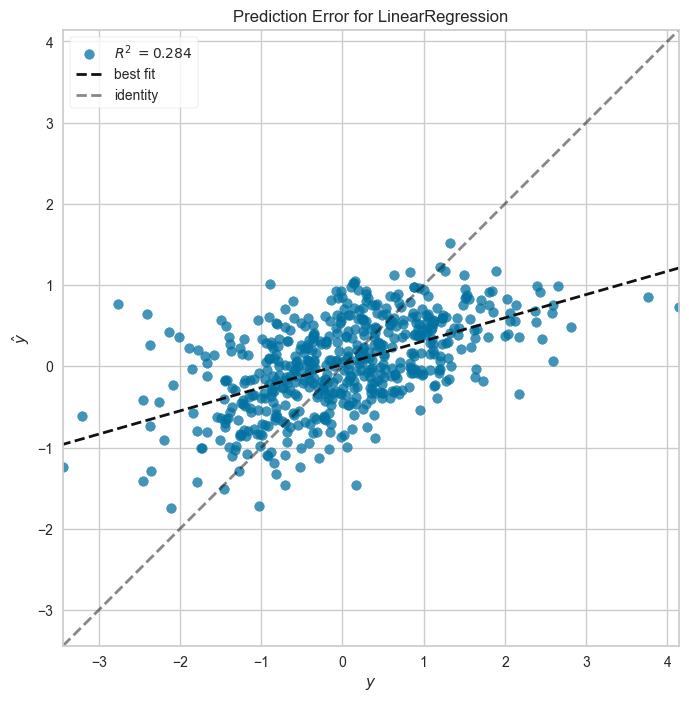

In [10]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test_std, y_test, is_fitted=True)

### Ridge Regression

We implement regularization (Ridge). We use the sklearn RidgeCV to get the best parameter using cross-validation. The parameters
tested are also set by sklearn automatically

In [11]:
ridge_cv = RidgeCV( scoring="r2", cv=10).fit(X_train_std, y_train)
ridge_r2_test= ridge_cv.score(X_test_std, y_test)
ridge_r2_val = ridge_cv.best_score_
ridge_r2_val2 = np.mean(cross_val_score( RidgeCV( scoring="r2", cv=10), X_train_std, y_train, scoring="r2" ))
ridge_r2_train= ridge_cv.score(X_train_std, y_train)

print("Train R2: ", ridge_r2_train)
print("Validation R2: ", ridge_r2_val)
print("Test R2: ", ridge_r2_test)
print(ridge_cv.alpha_)

Train R2:  0.3205805700198089
Validation R2:  0.2869780934161992
Test R2:  0.28375298070340405
10.0


### Lasso Regression

The same as Ridge, but this time Lasso, also with cross-validation

In [13]:
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train_std, y_train)
lasso_r2_test= lasso_cv.score(X_test_std, y_test)
lasso_r2_val = np.mean(cross_val_score( LassoCV(random_state=0, cv=5), X_train_std, y_train, scoring="r2" ))
lasso_r2_train= lasso_cv.score(X_train_std, y_train)

print("Train R2: ", lasso_r2_train)
print("Validation R2: ", lasso_r2_val)
print("Test R2: ", lasso_r2_test)
print(lasso_cv.alpha_)

Train R2:  0.3157212502510993
Validation R2:  0.28743617498571294
Test R2:  0.27943700846653574
0.008135293759221052


### ElasticNet

Elasticnet, combines l1 and l2 regularization. Also uses cross-validation.

In [14]:
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
elasticnet_cv = ElasticNetCV(cv=5, random_state=0).fit(X_train_std, y_train)
elasticnet_r2_test= elasticnet_cv.score(X_test_std, y_test)
elasticnet_r2_val = np.mean(cross_val_score( ElasticNetCV(random_state=0, cv=5), X_train_std, y_train, scoring="r2" ))
elasticnet_r2_train= elasticnet_cv.score(X_train_std, y_train)

print("Train R2: ", elasticnet_r2_train)
print("Validation R2: ", elasticnet_r2_val)
print("Test R2: ", elasticnet_r2_test)
print(elasticnet_cv.alpha_)

Train R2:  0.31585314127375164
Validation R2:  0.28715064199956275
Test R2:  0.27943383679916756
0.015174004375455446


### Linear models results

We visualize the results of the linear models. Note that the test can't be used to determine the best model, only the validation. The test has been added for
comparative purpouses

In [15]:
r2_results = pd.DataFrame({'LR': lr_r2_train, 'Ridge': ridge_r2_train, 'Lasso': lasso_r2_train, 'Elasticnet': elasticnet_r2_train}, index=['Train R2'])


print([lr_r2_val, ridge_r2_val, lasso_r2_val])
lr_r2_val = np.mean(lr_r2_val)
r2_results.loc['CV (Val) R2', :] = [lr_r2_val, ridge_r2_val, lasso_r2_val, elasticnet_r2_val]
r2_results.loc['Test R2', :] = [lr_r2_test, ridge_r2_test, lasso_r2_test, elasticnet_r2_test]


r2_results.loc['lambda','LR']=0
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','Lasso']=lasso_cv.alpha_
r2_results.loc['lambda','Elasticnet']=elasticnet_cv.alpha_
r2_results


[0.28118651152795227, 0.2869780934161992, 0.28743617498571294]


,LR,Ridge,Lasso,Elasticnet
Train R2,0.319446,0.320581,0.315721,0.315853
CV (Val) R2,0.281187,0.286978,0.287436,0.287151
Test R2,0.283696,0.283753,0.279437,0.279434
lambda,0.000000,10.000000,0.008135,0.015174


We can also visualize the coeficients of the fitted models, to extract some more conclusions

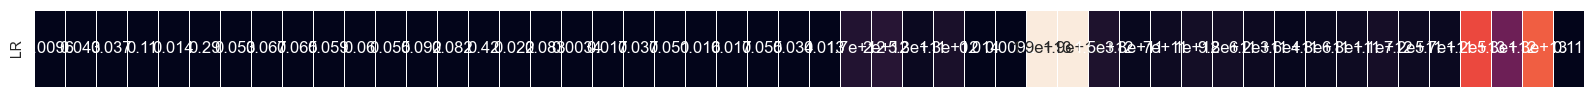

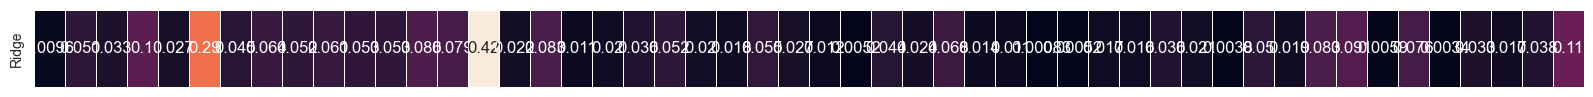

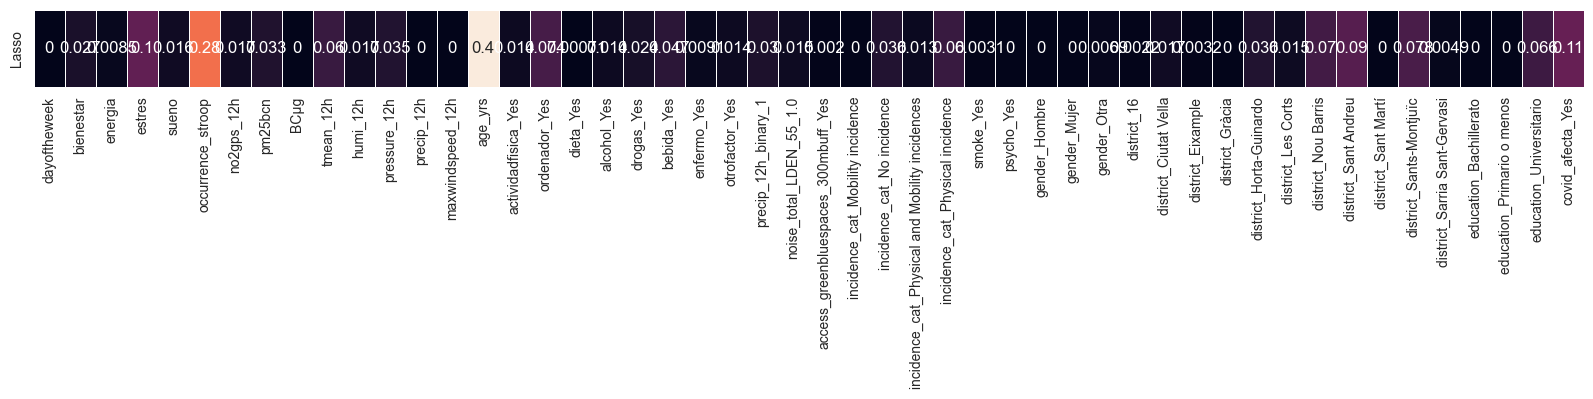

In [16]:
weights = pd.DataFrame({'LR':lr.coef_, 'Ridge':ridge_cv.coef_, 'Lasso':lasso_cv.coef_},index=X_train_std.columns)

fig, ax = plt.subplots(figsize = (20,1))
sns.heatmap(weights.T.loc[['LR'],:].abs(), annot=True, linewidths=.5, ax=ax, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Ridge'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Lasso'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=True);

### Using Statsmodels library

An alternative to sklearn models, we can use a GLM from the StatsModels library, with a gaussian family.

In [17]:
def normality(model, X, y):
  residus = y - model.predict(X)
  f, ax = plt.subplots(figsize=(6,6))
  sns.histplot(data=residus, bins=20, kde=True)
  print(statsmodels.stats.diagnostic.normal_ad(residus))

def linearity(model, X, y):
  f, ax = plt.subplots(figsize=(6,6))

  predictions = model.predict(X)
  ax.scatter(y, predictions)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="red")
  plt.show()

In [18]:
X_train_std = sm.add_constant(X_train_std)  # Add intercept
X_test_std = sm.add_constant(X_test_std) 
glm_model = sm.GLM(y_train, X_train_std, family=sm.families.Gaussian()).fit()

# Print summary
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2251
Model:                            GLM   Df Residuals:                     2204
Model Family:                Gaussian   Df Model:                           46
Link Function:               Identity   Scale:                         0.70570
Method:                          IRLS   Log-Likelihood:                -2759.0
Date:                Tue, 07 May 2024   Deviance:                       1529.3
Time:                        08:57:29   Pearson chi2:                 1.53e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3656
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

We can also visualize the results of this model, that has a training R2 of 0.3656 and a test 0.283 (very similar to the other, only a slight difference)

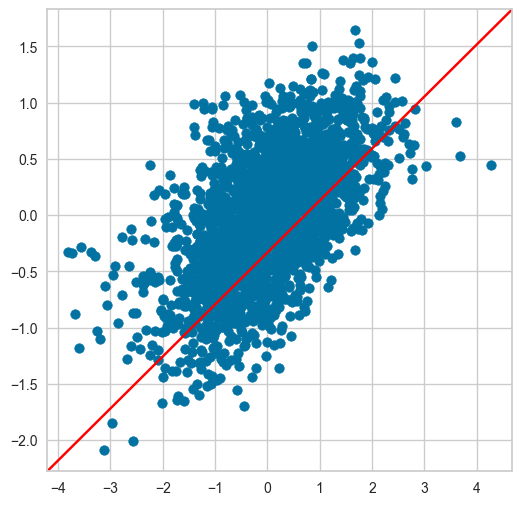

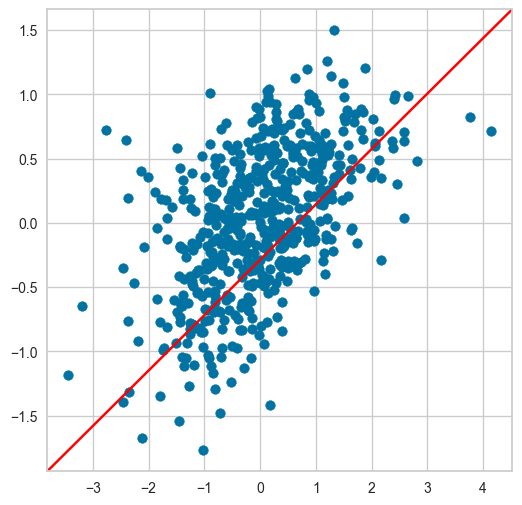

0.2838200175465829

In [19]:
glm_model.predict(X_train_std)
linearity(glm_model, X_train_std, y_train)
linearity(glm_model, X_test_std, y_test)

r2_score(y_test, glm_model.predict(X_test_std))

We assess the normality of the residuals

(1.649573992034675, 0.00031084576076158667)
(0.7355666378070964, 0.0549581524794816)


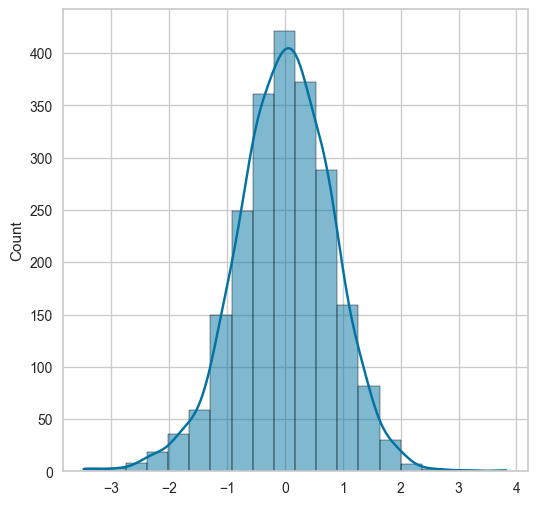

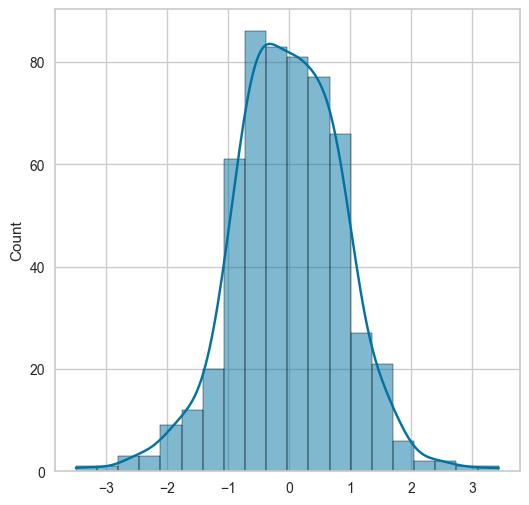

In [20]:
normality(glm_model, X_train_std, y_train)
normality(glm_model, X_test_std, y_test)

# MLP (Multi Layer Perceptron)

Following up, we create the multi layer perceptron. The following function allows us to visualize the evolution during training.

In [22]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()


## First iteration

In [25]:
# Define the optimizer and learning rate
learning_rate = 0.001

num_epochs = 1000
batch_size = 32

training_r2s = []
training_MSEs = []
validation_r2s = []
validation_MSEs = []

for _ in range(5):
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)

    model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_std.shape[1],)),
    Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'r2_score'])
    callback = EarlyStopping(monitor='val_mean_squared_error',patience=15)

    # Train the model

    history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

    y_train_pred = model.predict(X_train_std)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    best_val_r2 = max(history.history['val_r2_score'])  # Final validation loss
    best_val_mse = max(history.history['val_mean_squared_error'])  # Final validation accuracy

    training_r2s.append(train_r2)
    training_MSEs.append(train_mse)
    validation_r2s.append(best_val_r2)
    validation_MSEs.append(best_val_mse)

print("Final Validation MSE:", validation_MSEs)
print("Final Validation R-squared:", validation_r2s)

print("Best Validation MSE:", max(validation_MSEs))
print("Best Validation R-squared:", max(validation_r2s))

print('Training MSE: ', training_MSEs)
print('Training R-squared: ', training_r2s)

print('Best Training MSE: ', max(training_MSEs))
print('Best Training R-squared: ', max(training_r2s))

iterations_r2_train = []
iterations_r2_val = []
iterations_r2_train.append(np.mean(training_r2s))
iterations_r2_val.append(np.mean(validation_r2s))

Epoch 1/1000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4249 - mean_squared_error: 1.4249 - r2_score: -0.4322 - val_loss: 0.9070 - val_mean_squared_error: 0.9070 - val_r2_score: 0.0370
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8691 - mean_squared_error: 0.8691 - r2_score: 0.1345 - val_loss: 0.7767 - val_mean_squared_error: 0.7767 - val_r2_score: 0.1753
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7411 - mean_squared_error: 0.7411 - r2_score: 0.2593 - val_loss: 0.7143 - val_mean_squared_error: 0.7143 - val_r2_score: 0.2416
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6849 - mean_squared_error: 0.6849 - r2_score: 0.2913 - val_loss: 0.6878 - val_mean_squared_error: 0.6878 - val_r2_score: 0.2697
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6287 - mean_squared_error: 0.6287 - r2_score: 0.3648 - val_loss: 0.6625 - val_mean_squared_error: 0.6625 - val_r2_score: 0.2966
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7269 - mean_squared_error: 1.7269 - r2_score: -0.6299 - val_loss: 0.9220 - val_mean_squared_error: 0.9220 - val_r2_score: 0.0211
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9314 - mean_squared_error: 0.9314 - r2_score: 0.1087 - val_loss: 0.7791 - val_mean_squared_error: 0.7791 - val_r2_score: 0.1728
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7992 - mean_squared_error: 0.7992 - r2_score: 0.2179 - val_loss: 0.7190 - val_mean_squared_error: 0.7190 - val_r2_score: 0.2365
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6221 - mean_squared_error: 0.6221 - r2_score: 0.3578 - val_loss: 0.6846 - val_mean_squared_error: 0.6846 - val_r2_score: 0.2731
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6359 - mean_squared_error: 0.6359 - r2_score: 0.4046 - val_loss: 0.6744 - val_mean_squared_error: 0.6744 - val_r2_score: 0.2840
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.3590 - mean_squared_error: 1.3590 - r2_score: -0.3936 - val_loss: 0.8341 - val_mean_squared_error: 0.8341 - val_r2_score: 0.1144
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8134 - mean_squared_error: 0.8134 - r2_score: 0.2060 - val_loss: 0.6800 - val_mean_squared_error: 0.6800 - val_r2_score: 0.2780
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6647 - mean_squared_error: 0.6647 - r2_score: 0.3169 - val_loss: 0.6506 - val_mean_squared_error: 0.6506 - val_r2_score: 0.3092
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6445 - mean_squared_error: 0.6445 - r2_score: 0.3648 - val_loss: 0.6169 - val_mean_squared_error: 0.6169 - val_r2_score: 0.3450
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6201 - mean_squared_error: 0.6201 - r2_score: 0.3867 - val_loss: 0.5932 - val_mean_squared_error: 0.5932 - val_r2_score: 0.3701
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2931 - mean_squared_error: 1.2931 - r2_score: -0.3275 - val_loss: 0.9475 - val_mean_squared_error: 0.9475 - val_r2_score: -0.0060
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8047 - mean_squared_error: 0.8047 - r2_score: 0.2168 - val_loss: 0.8194 - val_mean_squared_error: 0.8194 - val_r2_score: 0.1300
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7010 - mean_squared_error: 0.7010 - r2_score: 0.2840 - val_loss: 0.7676 - val_mean_squared_error: 0.7676 - val_r2_score: 0.1850
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6549 - mean_squared_error: 0.6549 - r2_score: 0.3337 - val_loss: 0.7469 - val_mean_squared_error: 0.7469 - val_r2_score: 0.2070
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5836 - mean_squared_error: 0.5836 - r2_score: 0.3984 - val_loss: 0.7187 - val_mean_squared_error: 0.7187 - val_r2_score: 0.2369
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4799 - mean_squared_error: 1.4799 - r2_score: -0.4010 - val_loss: 0.9435 - val_mean_squared_error: 0.9435 - val_r2_score: -0.0018
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8160 - mean_squared_error: 0.8160 - r2_score: 0.1593 - val_loss: 0.7488 - val_mean_squared_error: 0.7488 - val_r2_score: 0.2050
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7357 - mean_squared_error: 0.7357 - r2_score: 0.2717 - val_loss: 0.6914 - val_mean_squared_error: 0.6914 - val_r2_score: 0.2659
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6726 - mean_squared_error: 0.6726 - r2_score: 0.3233 - val_loss: 0.6487 - val_mean_squared_error: 0.6487 - val_r2_score: 0.3112
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5979 - mean_squared_error: 0.5979 - r2_score: 0.3893 - val_loss: 0.6303 - val_mean_squared_error: 0.6303 - val_r2_score: 0.3307
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

We visualize the evolution

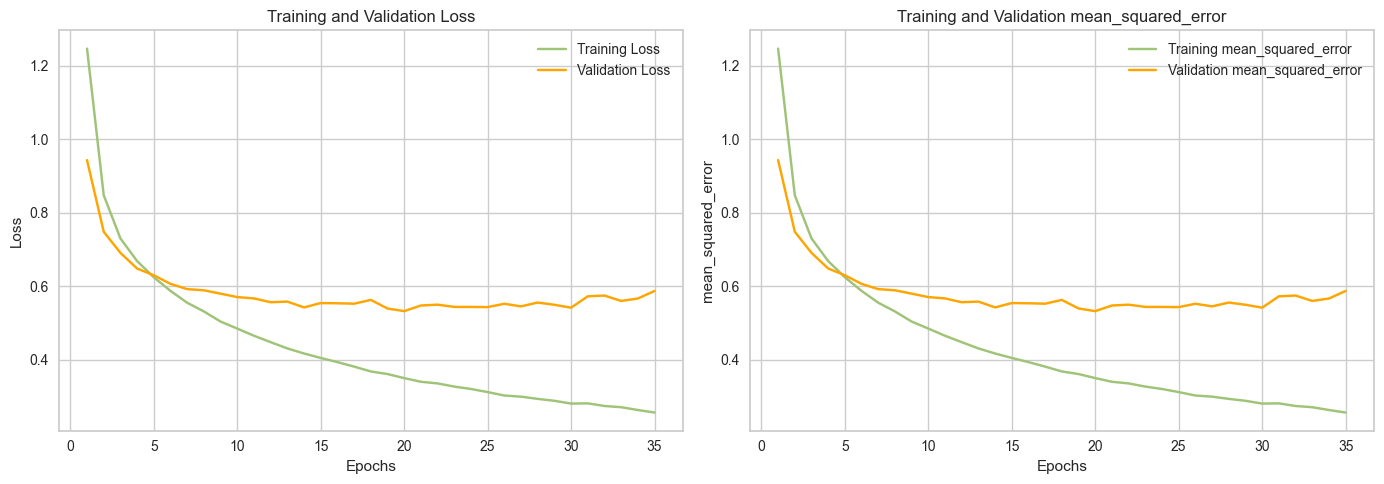

In [26]:
plot_curves(history)

Summary to visualize the number of parameters

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

## Second iteration

Based on the results of the previous iteration, we add some regularization

In [28]:
num_epochs = 1000
batch_size = 32

# Define the learning rate
learning_rate = 0.001


training_r2s = []
training_MSEs = []
validation_r2s = []
validation_MSEs = []
for _ in range(5):
    optimizer = Adam(learning_rate=learning_rate)
    model = Sequential([
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_std.shape[1],)),
    Dropout(0.2),
    Dense(1)
    ])
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'r2_score'])
    callback = EarlyStopping(monitor='val_mean_squared_error', patience=15)

    # Train the model

    history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

    y_train_pred = model.predict(X_train_std)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    best_val_r2 = max(history.history['val_r2_score'])  # Final validation loss is [-1]
    best_val_mse = max(history.history['val_mean_squared_error'])  # Final validation accuracy is [-1]

    training_r2s.append(train_r2)
    training_MSEs.append(train_mse)
    validation_r2s.append(best_val_r2)
    validation_MSEs.append(best_val_mse)

print("Final Validation MSE:", validation_MSEs)
print("Final Validation R-squared:", validation_r2s)

print("Best Validation MSE:", max(validation_MSEs))
print("Best Validation R-squared:", max(validation_r2s))

print('Training MSE: ', training_MSEs)
print('Training R-squared: ', training_r2s)

print('Best Training MSE: ', max(training_MSEs))
print('Best Training R-squared: ', max(training_r2s))

iterations_r2_train.append(np.mean(training_r2s))
iterations_r2_val.append(np.mean(validation_r2s))

Epoch 1/1000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1916 - mean_squared_error: 1.6835 - r2_score: -0.5923 - val_loss: 1.4443 - val_mean_squared_error: 0.9794 - val_r2_score: -0.0399
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4584 - mean_squared_error: 1.0047 - r2_score: -0.0079 - val_loss: 1.2137 - val_mean_squared_error: 0.7915 - val_r2_score: 0.1596
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2897 - mean_squared_error: 0.8770 - r2_score: 0.0490 - val_loss: 1.1218 - val_mean_squared_error: 0.7345 - val_r2_score: 0.2201
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1980 - mean_squared_error: 0.8181 - r2_score: 0.2050 - val_loss: 1.0516 - val_mean_squared_error: 0.6936 - val_r2_score: 0.2636
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1448 - mean_squared_error: 0.7935 - r2_score: 0.2311 - val_loss: 1.0093 - val_mean_squared_error: 0.6779 - val_r2_score: 0.2802
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2049 - mean_squared_error: 1.7202 - r2_score: -0.6863 - val_loss: 1.3324 - val_mean_squared_error: 0.8864 - val_r2_score: 0.0588
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4967 - mean_squared_error: 1.0609 - r2_score: -0.0637 - val_loss: 1.1602 - val_mean_squared_error: 0.7527 - val_r2_score: 0.2008
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2757 - mean_squared_error: 0.8761 - r2_score: 0.1396 - val_loss: 1.0626 - val_mean_squared_error: 0.6873 - val_r2_score: 0.2703
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1654 - mean_squared_error: 0.7970 - r2_score: 0.2010 - val_loss: 1.0105 - val_mean_squared_error: 0.6628 - val_r2_score: 0.2963
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1287 - mean_squared_error: 0.7873 - r2_score: 0.2192 - val_loss: 0.9734 - val_mean_squared_error: 0.6507 - val_r2_score: 0.3091
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0960 - mean_squared_error: 1.6007 - r2_score: -0.5603 - val_loss: 1.3308 - val_mean_squared_error: 0.8783 - val_r2_score: 0.0675
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5043 - mean_squared_error: 1.0626 - r2_score: -0.0953 - val_loss: 1.1788 - val_mean_squared_error: 0.7670 - val_r2_score: 0.1857
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3238 - mean_squared_error: 0.9204 - r2_score: 0.0986 - val_loss: 1.0904 - val_mean_squared_error: 0.7107 - val_r2_score: 0.2454
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1958 - mean_squared_error: 0.8231 - r2_score: 0.1577 - val_loss: 1.0326 - val_mean_squared_error: 0.6802 - val_r2_score: 0.2778
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1065 - mean_squared_error: 0.7603 - r2_score: 0.2026 - val_loss: 0.9675 - val_mean_squared_error: 0.6389 - val_r2_score: 0.3216
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9467 - mean_squared_error: 1.4635 - r2_score: -0.4881 - val_loss: 1.2744 - val_mean_squared_error: 0.8347 - val_r2_score: 0.1137
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4443 - mean_squared_error: 1.0165 - r2_score: -0.0642 - val_loss: 1.1074 - val_mean_squared_error: 0.7127 - val_r2_score: 0.2433
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2529 - mean_squared_error: 0.8674 - r2_score: 0.1150 - val_loss: 1.0333 - val_mean_squared_error: 0.6752 - val_r2_score: 0.2831
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1125 - mean_squared_error: 0.7621 - r2_score: 0.2147 - val_loss: 0.9692 - val_mean_squared_error: 0.6418 - val_r2_score: 0.3186
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0848 - mean_squared_error: 0.7640 - r2_score: 0.2654 - val_loss: 0.9154 - val_mean_squared_error: 0.6137 - val_r2_score: 0.3484
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.6632 - mean_squared_error: 2.1680 - r2_score: -1.2631 - val_loss: 1.4206 - val_mean_squared_error: 0.9560 - val_r2_score: -0.0150
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4811 - mean_squared_error: 1.0257 - r2_score: -0.0796 - val_loss: 1.2258 - val_mean_squared_error: 0.7974 - val_r2_score: 0.1533
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3640 - mean_squared_error: 0.9439 - r2_score: 0.0119 - val_loss: 1.1242 - val_mean_squared_error: 0.7291 - val_r2_score: 0.2258
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1816 - mean_squared_error: 0.7942 - r2_score: 0.1674 - val_loss: 1.0624 - val_mean_squared_error: 0.6965 - val_r2_score: 0.2605
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1180 - mean_squared_error: 0.7591 - r2_score: 0.1934 - val_loss: 0.9995 - val_mean_squared_error: 0.6599 - val_r2_score: 0.2994
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

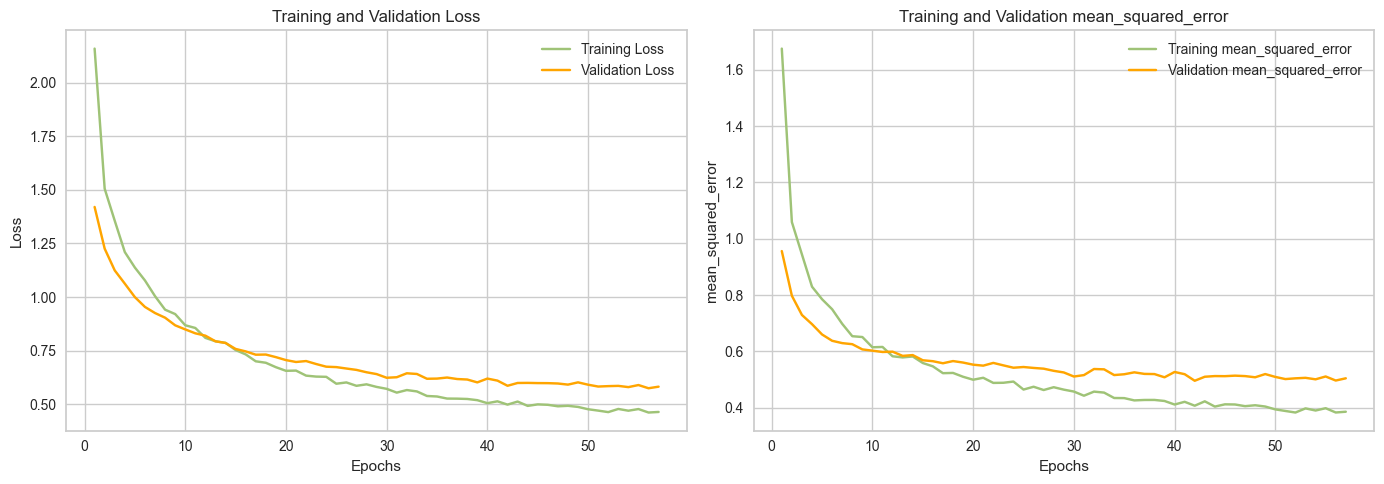

In [29]:
plot_curves(history)

## Third iteration

In this iteration, we try to create a more complex network

In [30]:
# Define the learning rate
learning_rate = 0.001


training_r2s = []
training_MSEs = []
validation_r2s = []
validation_MSEs = []
for _ in range(5):
    optimizer = Adam(learning_rate=learning_rate)
    model = Sequential([
        Dense(200, activation='relu', input_shape=(X_train_std.shape[1],)),
        Dropout(0.5),
        Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        Dropout(0.3),
        Dense(1)
    ])
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'r2_score'])
    callback = EarlyStopping(monitor='val_mean_squared_error', patience=15)

    # Train the model
    num_epochs = 1000
    batch_size = 32
    history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

    y_train_pred = model.predict(X_train_std)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    best_val_r2 = max(history.history['val_r2_score'])
    best_val_mse = max(history.history['val_mean_squared_error'])

    training_r2s.append(train_r2)
    training_MSEs.append(train_mse)
    validation_r2s.append(best_val_r2)
    validation_MSEs.append(best_val_mse)

print("Final Validation MSE:", validation_MSEs)
print("Final Validation R-squared:", validation_r2s)

print("Best Validation MSE:", max(validation_MSEs))
print("Best Validation R-squared:", max(validation_r2s))

print('Training MSE: ', training_MSEs)
print('Training R-squared: ', training_r2s)

print('Best Training MSE: ', max(training_MSEs))
print('Best Training R-squared: ', max(training_r2s))

iterations_r2_train.append(np.mean(training_r2s))
iterations_r2_val.append(np.mean(validation_r2s))

Epoch 1/1000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8543 - mean_squared_error: 1.3297 - r2_score: -0.3718 - val_loss: 2.9935 - val_mean_squared_error: 0.8630 - val_r2_score: 0.0837
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9792 - mean_squared_error: 0.9625 - r2_score: 0.0202 - val_loss: 2.4863 - val_mean_squared_error: 0.7823 - val_r2_score: 0.1694
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4716 - mean_squared_error: 0.8550 - r2_score: 0.1732 - val_loss: 2.0764 - val_mean_squared_error: 0.7040 - val_r2_score: 0.2526
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1101 - mean_squared_error: 0.8082 - r2_score: 0.1478 - val_loss: 1.7576 - val_mean_squared_error: 0.6495 - val_r2_score: 0.3103
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8083 - mean_squared_error: 0.7556 - r2_score: 0.2312 - val_loss: 1.5378 - val_mean_squared_error: 0.6386 - val_r2_score: 0.3219
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.7054 - mean_squared_error: 1.2223 - r2_score: -0.2086 - val_loss: 2.9506 - val_mean_squared_error: 0.8653 - val_r2_score: 0.0812
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9312 - mean_squared_error: 0.9591 - r2_score: 0.0231 - val_loss: 2.4350 - val_mean_squared_error: 0.7710 - val_r2_score: 0.1814
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4426 - mean_squared_error: 0.8653 - r2_score: 0.1426 - val_loss: 2.0631 - val_mean_squared_error: 0.7264 - val_r2_score: 0.2288
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1458 - mean_squared_error: 0.8758 - r2_score: 0.1750 - val_loss: 1.7715 - val_mean_squared_error: 0.6884 - val_r2_score: 0.2691
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8046 - mean_squared_error: 0.7752 - r2_score: 0.2253 - val_loss: 1.5127 - val_mean_squared_error: 0.6318 - val_r2_score: 0.3292
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.7952 - mean_squared_error: 1.2569 - r2_score: -0.2719 - val_loss: 3.0373 - val_mean_squared_error: 0.8684 - val_r2_score: 0.0779
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0069 - mean_squared_error: 0.9469 - r2_score: 0.0513 - val_loss: 2.5506 - val_mean_squared_error: 0.7987 - val_r2_score: 0.1519
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5379 - mean_squared_error: 0.8749 - r2_score: 0.1098 - val_loss: 2.1311 - val_mean_squared_error: 0.7152 - val_r2_score: 0.2406
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1823 - mean_squared_error: 0.8371 - r2_score: 0.1775 - val_loss: 1.8474 - val_mean_squared_error: 0.7003 - val_r2_score: 0.2565
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9005 - mean_squared_error: 0.8102 - r2_score: 0.2130 - val_loss: 1.5852 - val_mean_squared_error: 0.6540 - val_r2_score: 0.3056
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.7104 - mean_squared_error: 1.2271 - r2_score: -0.2561 - val_loss: 2.9691 - val_mean_squared_error: 0.8530 - val_r2_score: 0.0943
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0488 - mean_squared_error: 1.0379 - r2_score: 0.0052 - val_loss: 2.4971 - val_mean_squared_error: 0.7781 - val_r2_score: 0.1739
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5172 - mean_squared_error: 0.8815 - r2_score: 0.1317 - val_loss: 2.0881 - val_mean_squared_error: 0.6845 - val_r2_score: 0.2732
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1617 - mean_squared_error: 0.8265 - r2_score: 0.1430 - val_loss: 1.8200 - val_mean_squared_error: 0.6724 - val_r2_score: 0.2860
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8603 - mean_squared_error: 0.7663 - r2_score: 0.2496 - val_loss: 1.5849 - val_mean_squared_error: 0.6423 - val_r2_score: 0.3180
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.9525 - mean_squared_error: 1.4361 - r2_score: -0.4059 - val_loss: 3.0208 - val_mean_squared_error: 0.8652 - val_r2_score: 0.0813
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0390 - mean_squared_error: 0.9883 - r2_score: 0.0108 - val_loss: 2.5576 - val_mean_squared_error: 0.7995 - val_r2_score: 0.1511
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5556 - mean_squared_error: 0.8811 - r2_score: 0.1302 - val_loss: 2.1515 - val_mean_squared_error: 0.7102 - val_r2_score: 0.2460
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2324 - mean_squared_error: 0.8579 - r2_score: 0.1760 - val_loss: 1.8630 - val_mean_squared_error: 0.6752 - val_r2_score: 0.2831
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9036 - mean_squared_error: 0.7696 - r2_score: 0.2644 - val_loss: 1.6411 - val_mean_squared_error: 0.6592 - val_r2_score: 0.3001
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.

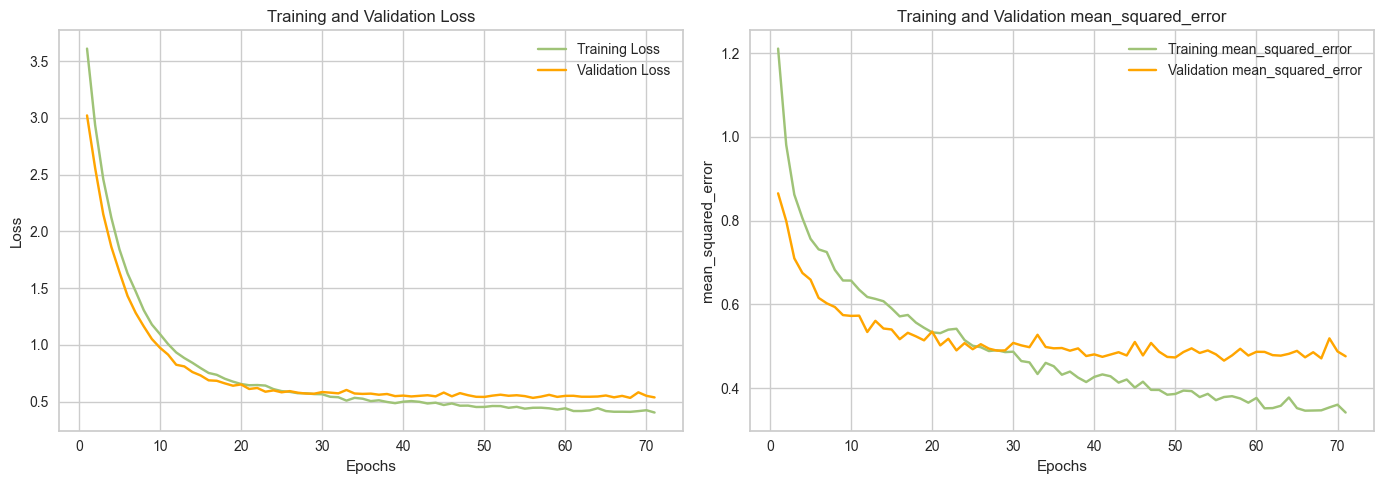

In [31]:
plot_curves(history)

## Fourth iteration

Final iteration, after lots of test.

In [32]:
# Custom activation for the penultimate layer
def clipped_relu(x):
    return tf.keras.backend.relu(x, max_value=1.0)

In [33]:
callback = EarlyStopping(monitor='loss', patience=3)
# Define the learning rate
learning_rate = 0.001

training_r2s = []
training_MSEs = []
validation_r2s = []
validation_MSEs = []
test_MSEs = []
test_r2s = []

for _ in range(5):
    model = Sequential([
    Dense(80, activation='leaky_relu', input_shape=(X_train_std.shape[1],), kernel_initializer=glorot_uniform(), bias_initializer = 'zeros'),
     BatchNormalization(),
    Dropout(0.25),
    Dense(80, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=glorot_uniform(), bias_initializer = 'zeros'),
     BatchNormalization(),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=glorot_uniform(), bias_initializer = 'zeros'),
     BatchNormalization(),
    Dropout(0.4),
    Dense(100, activation=clipped_relu, kernel_regularizer=regularizers.l2(0.001), kernel_initializer=glorot_uniform(), bias_initializer = 'zeros'),
    Dense(1, kernel_initializer=glorot_uniform())
    ])
    optimizer = Adam(learning_rate=learning_rate)

    # Add warmup and learning rate decay
    lr_scheduler = ReduceLROnPlateau(factor=0.95, patience=10, verbose=0, min_lr=1e-6)
    warmup_epochs = 10
    lr_warmup = lambda epoch: 1e-6 * epoch / warmup_epochs if epoch < warmup_epochs else 1
    # Compile the model
    model.compile(optimizer=optimizer, loss='huber', metrics=['mean_squared_error', 'r2_score'])
    callback = EarlyStopping(monitor='val_mean_squared_error', patience=50, restore_best_weights=True)

    # Train the model
    num_epochs = 1000
    batch_size = 64
    history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback, lr_scheduler], initial_epoch=0)

    y_train_pred = model.predict(X_train_std)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    best_val_r2 = max(history.history['val_r2_score'])
    best_val_mse = max(history.history['val_mean_squared_error'])

    y_test_pred = model.predict(X_test_std)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    training_r2s.append(train_r2)
    training_MSEs.append(train_mse)
    validation_r2s.append(best_val_r2)
    validation_MSEs.append(best_val_mse)
    test_MSEs.append(test_mse)
    test_r2s.append(test_r2)

print("Final Validation MSE:", validation_MSEs)
print("Final Validation R-squared:", validation_r2s)

print("Best Validation MSE:", max(validation_MSEs))
print("Best Validation R-squared:", max(validation_r2s))

print('Training MSE: ', training_MSEs)
print('Training R-squared: ', training_r2s)

print('Best Training MSE: ', max(training_MSEs))
print('Best Training R-squared: ', max(training_r2s))

print('Test MSE: ', test_MSEs)
print('Test R-squared: ', test_r2s)

print('Best Test MSE: ', max(test_MSEs))
print('Best Test R-squared: ', max(test_r2s))

iterations_r2_train.append(np.mean(training_r2s))
iterations_r2_val.append(np.mean(validation_r2s))

Epoch 1/1000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.7026 - mean_squared_error: 1.2522 - r2_score: -0.2351 - val_loss: 0.5834 - val_mean_squared_error: 0.8948 - val_r2_score: 0.0499 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6235 - mean_squared_error: 1.0270 - r2_score: -0.0092 - val_loss: 0.5636 - val_mean_squared_error: 0.8505 - val_r2_score: 0.0970 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5840 - mean_squared_error: 0.9129 - r2_score: 0.0385 - val_loss: 0.5441 - val_mean_squared_error: 0.8059 - val_r2_score: 0.1443 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5981 - mean_squared_error: 0.9728 - r2_score: 0.0887 - val_loss: 0.5241 - val_mean_squared_error: 0.7649 - val_r2_score: 0.1878 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5751 - mean_squared_error: 0.9144 - r2_score: 0.1171 - val_loss: 0.5088 - val_mean_squared_e

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7103 - mean_squared_error: 1.2614 - r2_score: -0.1912 - val_loss: 0.5806 - val_mean_squared_error: 0.8689 - val_r2_score: 0.0774 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6284 - mean_squared_error: 1.0462 - r2_score: 0.0365 - val_loss: 0.5543 - val_mean_squared_error: 0.8086 - val_r2_score: 0.1415 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5928 - mean_squared_error: 0.9413 - r2_score: 0.0652 - val_loss: 0.5190 - val_mean_squared_error: 0.7311 - val_r2_score: 0.2238 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5869 - mean_squared_error: 0.9291 - r2_score: 0.0789 - val_loss: 0.5047 - val_mean_squared_error: 0.7064 - val_r2_score: 0.2500 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5665 - mean_squared_error: 0.8686 - r2_score: 0.1320 - val_loss: 0.4841 - val_mean_squared_e

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.6892 - mean_squared_error: 1.1899 - r2_score: -0.1777 - val_loss: 0.5852 - val_mean_squared_error: 0.8895 - val_r2_score: 0.0555 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6426 - mean_squared_error: 1.0659 - r2_score: -0.0374 - val_loss: 0.5642 - val_mean_squared_error: 0.8417 - val_r2_score: 0.1063 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5983 - mean_squared_error: 0.9713 - r2_score: 0.0607 - val_loss: 0.5363 - val_mean_squared_error: 0.7806 - val_r2_score: 0.1712 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5763 - mean_squared_error: 0.9076 - r2_score: 0.0989 - val_loss: 0.5167 - val_mean_squared_error: 0.7388 - val_r2_score: 0.2155 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5800 - mean_squared_error: 0.9208 - r2_score: 0.0852 - val_loss: 0.5051 - val_mean_squared_e

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.7434 - mean_squared_error: 1.3789 - r2_score: -0.3873 - val_loss: 0.5977 - val_mean_squared_error: 0.9178 - val_r2_score: 0.0255 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6389 - mean_squared_error: 1.0410 - r2_score: -0.0341 - val_loss: 0.5833 - val_mean_squared_error: 0.8902 - val_r2_score: 0.0548 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6078 - mean_squared_error: 0.9791 - r2_score: 0.0387 - val_loss: 0.5637 - val_mean_squared_error: 0.8485 - val_r2_score: 0.0991 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5844 - mean_squared_error: 0.9062 - r2_score: 0.0870 - val_loss: 0.5484 - val_mean_squared_error: 0.8182 - val_r2_score: 0.1312 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5766 - mean_squared_error: 0.9204 - r2_score: 0.0834 - val_loss: 0.5248 - val_mean_squared_e

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.7180 - mean_squared_error: 1.2829 - r2_score: -0.2548 - val_loss: 0.5979 - val_mean_squared_error: 0.9214 - val_r2_score: 0.0217 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6243 - mean_squared_error: 1.0211 - r2_score: -0.0444 - val_loss: 0.5598 - val_mean_squared_error: 0.8348 - val_r2_score: 0.1136 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6184 - mean_squared_error: 1.0104 - r2_score: 0.0199 - val_loss: 0.5215 - val_mean_squared_error: 0.7429 - val_r2_score: 0.2112 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5903 - mean_squared_error: 0.9522 - r2_score: 0.0531 - val_loss: 0.4997 - val_mean_squared_error: 0.6989 - val_r2_score: 0.2579 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5648 - mean_squared_error: 0.8862 - r2_score: 0.1169 - val_loss: 0.4766 - val_mean_squared_e

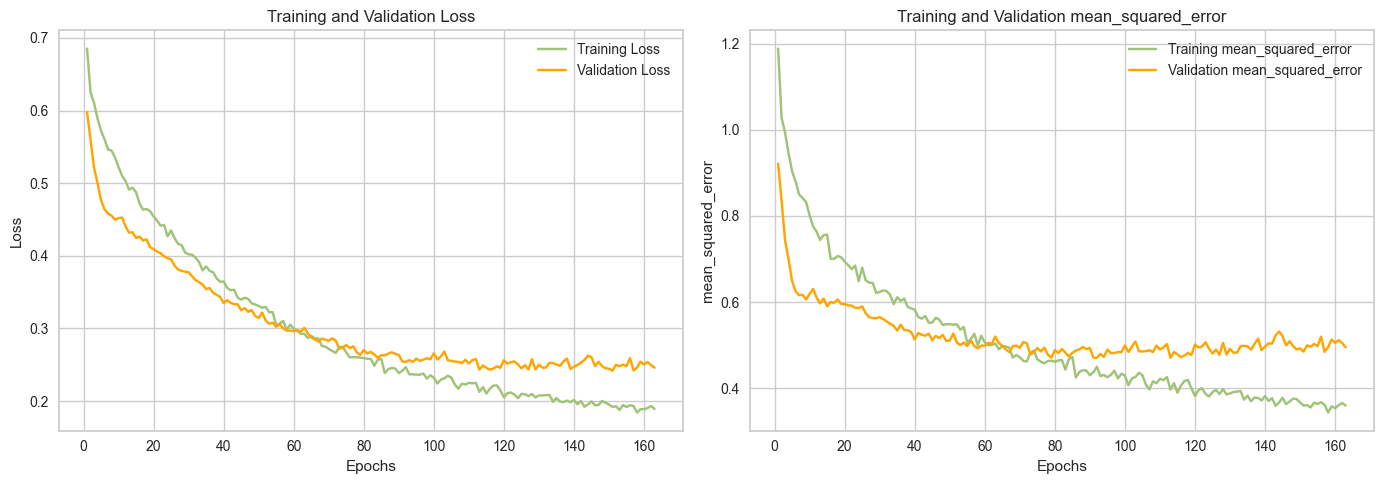

In [34]:
plot_curves(history)

## Results
We plot the results from all the iterations

In [35]:
for iter in range(len(iterations_r2_train)):
    print(f"Iteration {iter}")
    print("Train: ", iterations_r2_train[iter])
    print("Validation: ", iterations_r2_val[iter])

Train:  0.7342168458689826
Validation:  0.4136795163154602
Train:  0.6873268709921333
Validation:  0.4710348606109619
Train:  0.7105513136202658
Validation:  0.4916571617126465
Train:  0.7390555454327943
Validation:  0.5104053497314454


## Using MLPRegressor
As an alternative, we also tried what would a predefined MLP get. The results are similar, only a little bit worse than ours

In [36]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(800, 800, 800, 400,), random_state=1, max_iter=500).fit(X_train_std, y_train)

regr.score(X_test_std, y_test)

0.48890217509700606